# 67-364 Project 1
## Brandyn Amado, Shane Aung

## Data:

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

## Cleaning:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ibm_csv = 'https://raw.githubusercontent.com/Brandyn-Amado/67-364_Project_1/master/IBM-HR-Employee-Attrition.csv'

In [3]:
ibm = pd.read_csv(ibm_csv)

In [4]:
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
ibm.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
len(ibm)

1470

## Questions:

1. How do attrition rates vary among employees of different positions, time spent in their position, and seniority levels?

2. How does life status (age, marital status, education, work/life balance) affect job satisfaction and performance?

In [7]:
ibm_single = ibm[ ibm['MaritalStatus'] == 'Single' ]
ibm_married = ibm[ ibm['MaritalStatus'] == 'Married' ]
ibm_divorced = ibm[ ibm['MaritalStatus'] == 'Divorced' ]

In [8]:
x = range(1,5)
ibm_single_y = ibm_single['JobSatisfaction'].value_counts().map(lambda x: x / len(ibm_single) * 100).sort_values()
ibm_married_y = ibm_married['JobSatisfaction'].value_counts().map(lambda x: x / len(ibm_married) * 100).sort_values()
ibm_divorced_y = ibm_divorced['JobSatisfaction'].value_counts().map(lambda x: x / len(ibm_divorced) * 100).sort_values()

In [9]:
len(ibm_single) + len(ibm_married) + len(ibm_divorced)

1470

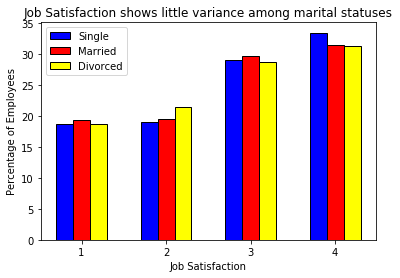

In [10]:
ax = plt.gca()

single_plot = plt.bar(np.arange(1,5)-0.3, ibm_single_y, align='edge', width=0.2, color='blue', edgecolor='black')
married_plot = plt.bar(np.arange(1,5)-0.1, ibm_married_y, align='edge', width=0.2, color='red', edgecolor='black')
divorced_plot = plt.bar(np.arange(1,5)+0.1, ibm_divorced_y, align='edge', width=0.2, color='yellow', edgecolor='black')

leg = ax.legend((single_plot[0], married_plot[0], divorced_plot[0]), ('Single', 'Married', 'Divorced'))

plt.xticks(np.arange(1, 5, 1.0))
plt.xlabel('Job Satisfaction')
plt.ylabel('Percentage of Employees')
plt.title('Job Satisfaction shows little variance among marital statuses')
plt.show()

In [11]:
ibm_single_y = ibm_single['PerformanceRating'].value_counts().map(lambda x: x / len(ibm_single) * 100).sort_values()
ibm_married_y = ibm_married['PerformanceRating'].value_counts().map(lambda x: x / len(ibm_married) * 100).sort_values()
ibm_divorced_y = ibm_divorced['PerformanceRating'].value_counts().map(lambda x: x / len(ibm_divorced) * 100).sort_values()

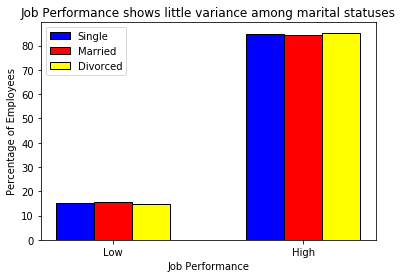

In [12]:
ax = plt.gca()

single_plot = plt.bar(np.arange(3,5)-0.3, ibm_single_y, align='edge', width=0.2, color='blue', edgecolor='black')
married_plot = plt.bar(np.arange(3,5)-0.1, ibm_married_y, align='edge', width=0.2, color='red', edgecolor='black')
divorced_plot = plt.bar(np.arange(3,5)+0.1, ibm_divorced_y, align='edge', width=0.2, color='yellow', edgecolor='black')

leg = ax.legend((single_plot[0], married_plot[0], divorced_plot[0]), ('Single', 'Married', 'Divorced'))

plt.xticks(np.arange(3, 5, 1.0))
ax.set_xticklabels(['Low', 'High'])
plt.xlabel('Job Performance')
plt.ylabel('Percentage of Employees')
plt.title('Job Performance shows little variance among marital statuses')
plt.show()

In [13]:
ibm_nontravel = ibm[ ibm['BusinessTravel'] == 'Non-Travel' ]
ibm_rarely = ibm[ ibm['BusinessTravel'] == 'Travel_Rarely' ]
ibm_frequently = ibm[ ibm['BusinessTravel'] == 'Travel_Frequently' ]

In [14]:
ibm_nontravel_y = ibm_nontravel['JobSatisfaction'].value_counts().map(lambda x: x / len(ibm_nontravel) * 100).sort_values()
ibm_rarely_y = ibm_rarely['JobSatisfaction'].value_counts().map(lambda x: x / len(ibm_rarely) * 100).sort_values()
ibm_frequently_y = ibm_frequently['JobSatisfaction'].value_counts().map(lambda x: x / len(ibm_frequently) * 100).sort_values()

In [15]:
len(ibm_nontravel) + len(ibm_rarely) + len(ibm_frequently)

1470

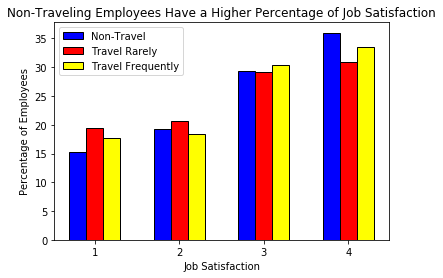

In [16]:
ax = plt.gca()

nontravel_plot = plt.bar(np.arange(1,5)-0.3, ibm_nontravel_y, align='edge', width=0.2, color='blue', edgecolor='black')
rarely_plot = plt.bar(np.arange(1,5)-0.1, ibm_rarely_y, align='edge', width=0.2, color='red', edgecolor='black')
frequently_plot = plt.bar(np.arange(1,5)+0.1, ibm_frequently_y, align='edge', width=0.2, color='yellow', edgecolor='black')

leg = ax.legend((nontravel_plot[0], rarely_plot[0], frequently_plot[0]), ('Non-Travel', 'Travel Rarely', 'Travel Frequently'))

plt.xticks(np.arange(1, 5, 1.0))
plt.xlabel('Job Satisfaction')
plt.ylabel('Percentage of Employees')
plt.title('Non-Traveling Employees Have a Higher Percentage of Job Satisfaction')
plt.show()

In [17]:
ibm_nontravel_y = ibm_nontravel['PerformanceRating'].value_counts().map(lambda x: x / len(ibm_nontravel) * 100).sort_values()
ibm_rarely_y = ibm_rarely['PerformanceRating'].value_counts().map(lambda x: x / len(ibm_rarely) * 100).sort_values()
ibm_frequently_y = ibm_frequently['PerformanceRating'].value_counts().map(lambda x: x / len(ibm_frequently) * 100).sort_values()

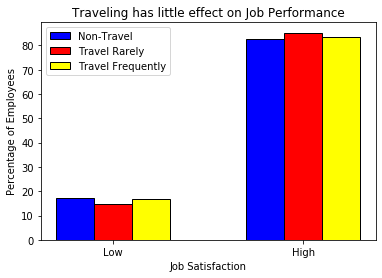

In [18]:
ax = plt.gca()

nontravel_plot = plt.bar(np.arange(3,5)-0.3, ibm_nontravel_y, align='edge', width=0.2, color='blue', edgecolor='black')
rarely_plot = plt.bar(np.arange(3,5)-0.1, ibm_rarely_y, align='edge', width=0.2, color='red', edgecolor='black')
frequently_plot = plt.bar(np.arange(3,5)+0.1, ibm_frequently_y, align='edge', width=0.2, color='yellow', edgecolor='black')

leg = ax.legend((nontravel_plot[0], rarely_plot[0], frequently_plot[0]), ('Non-Travel', 'Travel Rarely', 'Travel Frequently'))

plt.xticks(np.arange(3, 5, 1.0))
ax.set_xticklabels(['Low', 'High'])
plt.xlabel('Job Satisfaction')
plt.ylabel('Percentage of Employees')
plt.title('Traveling has little effect on Job Performance')
plt.show()

3. How does income/salary affect job attrition and job performance?

Text(0, 0.5, 'Number of Employees')

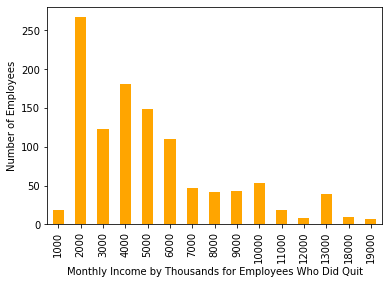

In [38]:
ibm_yes = ibm[ibm['Attrition'] == 'Yes']
ibm_no = ibm[ibm['Attrition'] == 'No']


ibm_no_income = ibm_no['MonthlyIncome'].apply(lambda x: x//1000*1000)

#value_counts().sort_index().plot.bar(color='orange')

# ibm_hourly_rate = ibm[ibm['HourlyRate']]
# ibm_monthly_income = ibm[ibm['MonthlyIncome']]
# ibm_monthly_rate = ibm[ibm['MonthlyRate']]
# ibm_pct_salary_hike = ibm[ibm['PercentSalaryHike']]
# ibm_stock_option_level = ibm[ibm['StockOptionLevel']]

ax = ibm_no_income.value_counts().sort_index().plot.bar(color='orange')
ax.set_xlabel("Monthly Income by Thousands for Employees Who Did Not Quit")
ax.set_ylabel("Number of Employees")



Text(0, 0.5, 'Number of Employees')

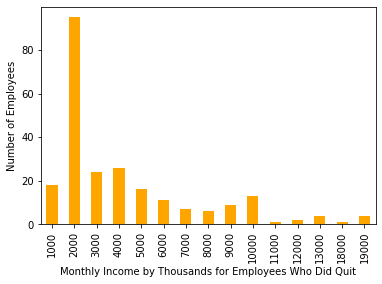

In [37]:
ibm_yes_income = ibm_yes['MonthlyIncome'].apply(lambda x: x//1000*1000)
ax = ibm_yes_income.value_counts().sort_index().plot.bar(color='orange')
ax.set_xlabel("Monthly Income by Thousands for Employees Who Did  Quit")
ax.set_ylabel("Number of Employees")


In [ ]:



ibm_yes_income = ibm_yes['MonthlyIncome'].apply(lambda x: x//1000*1000)

ibm_yes_hourly = ibm_yes['MonthlyIncome'].apply(lambda x: x//1000*1000)

Text(0, 0.5, 'Number of Employees')

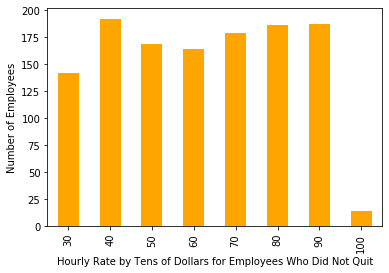

Text(0, 0.5, 'Number of Employees')

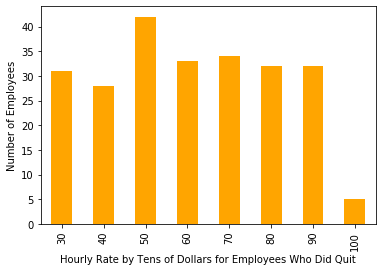

In [43]:
ibm_yes_hourly = ibm_yes['HourlyRate'].apply(lambda x: x//10*10)
ax = ibm_yes_hourly.value_counts().sort_index().plot.bar(color='orange')
ax.set_xlabel("Hourly Rate by Tens of Dollars for Employees Who Did Quit")
ax.set_ylabel("Number of Employees")

Text(0, 0.5, 'Number of Employees')

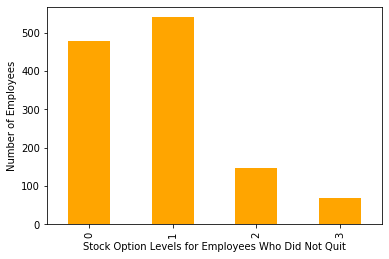

In [47]:
ibm_no_stock = ibm_no['StockOptionLevel']
ax = ibm_no_stock.value_counts().sort_index().plot.bar(color='orange')
ax.set_xlabel("Stock Option Levels for Employees Who Did Not Quit")
ax.set_ylabel("Number of Employees")


Text(0, 0.5, 'Number of Employees')

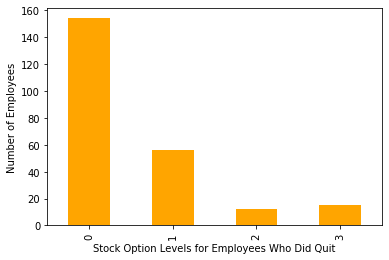

In [48]:
ibm_yes_stock = ibm_yes['StockOptionLevel']
ax = ibm_yes_stock.value_counts().sort_index().plot.bar(color='orange')
ax.set_xlabel("Stock Option Levels for Employees Who Did Quit")
ax.set_ylabel("Number of Employees")


Text(0, 0.5, 'Number of Employees')

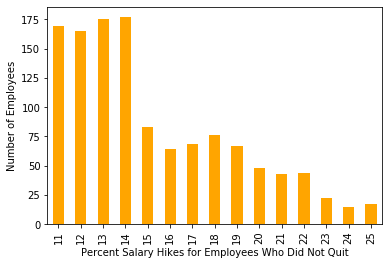

In [49]:
ibm_no_psh = ibm_no['PercentSalaryHike']
ax = ibm_no_psh.value_counts().sort_index().plot.bar(color='orange')
ax.set_xlabel("Percent Salary Hikes for Employees Who Did Not Quit")
ax.set_ylabel("Number of Employees")


Text(0, 0.5, 'Number of Employees')

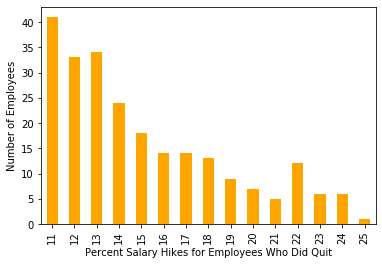

In [50]:
ibm_yes_psh = ibm_yes['PercentSalaryHike']
ax = ibm_yes_psh.value_counts().sort_index().plot.bar(color='orange')
ax.set_xlabel("Percent Salary Hikes for Employees Who Did Quit")
ax.set_ylabel("Number of Employees")